## Set up Colab environment

In [ ]:
!git clone https://github.com/hayakzan/VAE_experiment

Cloning into 'VAE_experiment'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 195 (delta 24), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (195/195), 94.07 MiB | 20.76 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [ ]:
cd VAE_experiment

/content/VAE_experiment


In [ ]:
!unzip dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/pic02596.png    
  inflating: __MACOSX/dataset/._pic02596.png  
  inflating: dataset/pic04681.png    
  inflating: __MACOSX/dataset/._pic04681.png  
  inflating: dataset/pic01921.png    
  inflating: __MACOSX/dataset/._pic01921.png  
  inflating: dataset/pic01909.png    
  inflating: __MACOSX/dataset/._pic01909.png  
  inflating: dataset/pic03878.png    
  inflating: __MACOSX/dataset/._pic03878.png  
  inflating: dataset/pic04656.png    
  inflating: __MACOSX/dataset/._pic04656.png  
  inflating: dataset/pic03139.png    
  inflating: __MACOSX/dataset/._pic03139.png  
  inflating: dataset/pic02227.png    
  inflating: __MACOSX/dataset/._pic02227.png  
  inflating: dataset/pic00430.png    
  inflating: __MACOSX/dataset/._pic00430.png  
  inflating: dataset/pic00356.png    
  inflating: __MACOSX/dataset/._pic00356.png  
  inflating: dataset/pic01048.png    
  inflating: __MACOSX/dataset/._pi

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Train VAE on graphs

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

from ml.utils import load_lego_faces, load_model, generate_morph_images, plot_reconstructed_images ##guessing morph_images is generate_morph_images
from ml.variational_autoencoder import VariationalAutoencoder

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3645440/45929032 bytes (7.9%)7577600/45929032 bytes (16.5%)11649024/45929032 bytes (25.4%)15892480/45929032 bytes (34.6%)20185088/45929032 bytes (43.9%)24002560/45929032 bytes (52.3%)28155904/45929032 bytes (61.3%)32292864/45929032 bytes (70.3%)36462592/45929032 bytes (79.4%)40656896/45929032 bytes (88.5%)44892160/45929032 bytes (97.7%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [ ]:
gesture_dict = load_gestures(size=64)
gestures = np.array(list(gesture_dict.values()))

In [ ]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

#using model.save_weights() to save the weights of the model in HDF5 format
vae.save("/content/gdrive/My Drive/pkl")

In [ ]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [ ]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [ ]:
vae.train(
    gestures,
    batch_size=BATCH_SIZE,
    epochs=3000
)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 1751/3000
4800/4800 [==============================] - ETA: 0s - loss: 12.6983 - vae_r_loss: 4.2278 - vae_kl_loss: 8.4705
Epoch 01751: saving model to /content/gdrive/My Drive/weights.h5
4800/4800 [==============================] - 6s 1ms/sample - loss: 12.6983 - vae_r_loss: 4.2278 - vae_kl_loss: 8.4705
Epoch 1752/3000
4768/4800 [============================>.] - ETA: 0s - loss: 12.7332 - vae_r_loss: 4.2570 - vae_kl_loss: 8.4762
Epoch 01752: saving model to /content/gdrive/My Drive/weights.h5
4800/4800 [==============================] - 6s 1ms/sample - loss: 12.7290 - vae_r_loss: 4.2542 - vae_kl_loss: 8.4748
Epoch 1753/3000
4768/4800 [============================>.] - ETA: 0s - loss: 12.6173 - vae_r_loss: 4.1945 - vae_kl_loss: 8.4228
Epoch 01753: saving model to /content/gdrive/My Drive/weights.h5
4800/4800 [==============================] - 6s 1ms/sample - loss: 12.6088 - vae_r_loss: 4.1843 - vae_kl_lo

## Do the fun stuff with the VAE

In [ ]:
import numpy as np
from ml.utils import (
    animate_morph_images,
    load_gestures,
    load_model,
    plot_morph_images,
    plot_random_faces,
    plot_reconstructed_images,
)

vae = load_model(path='trained_model') #ok this is solved...

gesture_dict = load_gestures(size=64)
filenames, gestures = zip(*gesture_dict.items())
gestures = np.array(list(gestures))

common_kwargs = {
    'encoder': vae.encoder_model,
    'decoder': vae.decoder_model,
}

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2940928/45929032 bytes (6.4%)6856704/45929032 bytes (14.9%)10821632/45929032 bytes (23.6%)15024128/45929032 bytes (32.7%)19275776/45929032 bytes (42.0%)23502848/45929032 bytes (51.2%)27705344/45929032 bytes (60.3%)31850496/45929032 bytes (69.3%)36118528/45929032 bytes (78.6%)40419328/45929032 bytes (88.0%)44605440/45929032 bytes (97.1%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

### Reconstruct faces

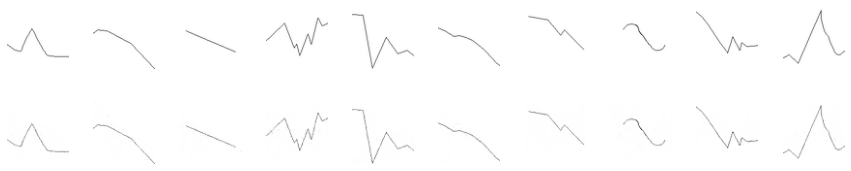

In [ ]:
plot_reconstructed_images(data=gestures, **common_kwargs)

### Generate new faces

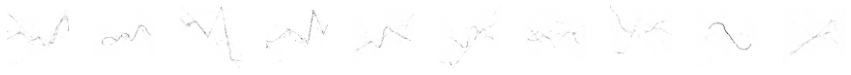

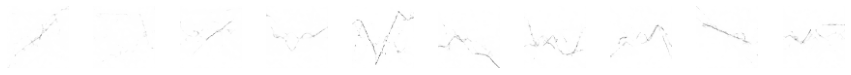

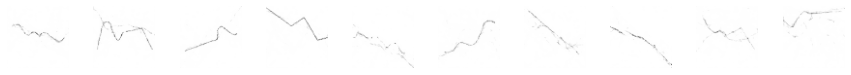

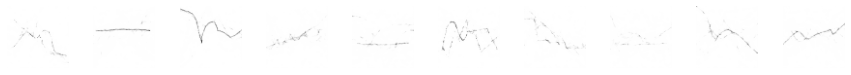

In [ ]:
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)

### Do face morphs

In [ ]:
pairs = [
    ('pic00000.png', 'pic00113.png'),
    ('pic00100.png', 'pic00199.png'),
    ('pic00020.png', 'pic00120.png'),
    ('pic00040.png', 'pic00140.png'),
    ('pic00070.png', 'pic00168.png'),
]

for f1, f2 in pairs:
    plot_morph_images(
        gesture_dict[f1], 
        gesture_dict[f2],
        **common_kwargs,
    )

NameError: ignored

In [ ]:
f1, f2 = pairs[3]
clip = animate_morph_images(
    gesture_dict[f1], 
    gesture_dict[f2],
    n_steps=90,
    **common_kwargs,
)
clip.ipython_display(width=400)

NameError: ignored

### Make t-SNE plots

In [ ]:
encodings = np.asarray(vae.encoder_model.predict(lego_faces), dtype=np.float64)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

enc_50d = PCA(n_components=50).fit_transform(encodings)
tsne_coords = TSNE(n_components=2).fit_transform(enc_50d)

ValueError: ignored

In [ ]:
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

offset = 0
num_to_show = 4000

x_coords, y_coords = list(zip(*tsne_coords[offset:offset + num_to_show]))
relevant_files = filenames[offset:offset + num_to_show]

fig, ax = plt.subplots(figsize=(50, 50))
ax.axis('off')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

i = 0
for x, y, filename in zip(x_coords, y_coords, relevant_files):
    ab = AnnotationBbox(
        OffsetImage(plt.imread(join('dataset', filename)), zoom=0.2),
        xy=(x, y),
        frameon=False,
    )
    ax.add_artist(ab)
    i += 1

plt.show()